# ДПО

## Домашнее задание NN_L1

Задания 1-10 - обязательные <br>
Задание 11 - опциональное <br>
Выполнять задания необходимо без использования numpy (только TensorFlow / PyTorch) 

### 1) Импортируйте tensorflow

In [1]:
import tensorflow as tf

tf.__version__

'1.12.0'

### 2) Определите два Placeholder-a A(передайте 4) и B(передайте 3) и две переменных a(инициализируйте - 2-кой) и b(инициализируйте - 1) и в рамках tf-сессии сложите их

In [2]:
tf.reset_default_graph()

In [3]:
A = tf.placeholder(dtype=tf.float16, shape=[1])
B = tf.placeholder(dtype=tf.float16, shape=[1])

a = tf.Variable(2, dtype=tf.float16)
b = tf.Variable(1, dtype=tf.float16)

r = A + B + a + b

In [4]:
tfs = tf.Session()

In [5]:
tfs.run(tf. variables_initializer([a, b]))    
print(tfs.run(r, feed_dict={A : [4], B : [3]}))

[10.]


### 3) Создайте 1D Tensor от 0 до 10 с шагом 2 - [0, 2, 4, 6, 8]

In [6]:
vector_even = tf.range(0, 10, 2)

print(tfs.run(vector_even))

[0 2 4 6 8]


### 4) Отфильтруйте каждое второе значение вектора созданного на предыдущего шаге

In [7]:
print(tfs.run(vector_even[0::2]))

[0 4 8]


### 5) Создайте матрицу 3х3, где значения будут 
[0, 1, 2],<br>
       [3, 4, 5],<br>
       [6, 7, 8]<br>

In [8]:
matrix33 = tf.reshape(tf.range(9), [3, 3])

print(tfs.run(matrix33))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### 6) Посчитайте среднее значение, сумму, а также максимум вектора a = [1,2,3,4,5,6,7,8,9]

In [9]:
vec_a = tf.range(1,10)

print('vector : {}'.format(tfs.run(vec_a)))
print('mean : {}'.format(tfs.run(tf.reduce_mean(vec_a))))
print('sum : {}'.format(tfs.run(tf.reduce_sum(vec_a))))
print('max : {}'.format(tfs.run(tf.reduce_max(vec_a))))

vector : [1 2 3 4 5 6 7 8 9]
mean : 5
sum : 45
max : 9


### 7) Создайте матрицу 10х10, где все значения распределены равномерно

In [10]:
random_matrix = tf.random_uniform(shape=[10, 10])

print(tfs.run(random_matrix).shape)

(10, 10)


### 8) Создайте матрицу 5х5 где все значения -1, а на главной диагонали +1 

In [11]:
martix55 = tf.eye(5) * 2 + tf.negative(tf.ones([5, 5]))

print(tfs.run(martix55))

[[ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1.  1.]]


### 9) Разбейте вектор a = [1,2,3,4,5,6,7,8] на два

In [12]:
vec8 = tf.range(1, 9)

print(tfs.run(vec8))
print(tfs.run(tf.split(vec8, 2)))

[1 2 3 4 5 6 7 8]
[array([1, 2, 3, 4]), array([5, 6, 7, 8])]


In [13]:
tfs.close()

### 10) Даны точки x и y, восстановите зависимость:

In [14]:
import numpy as np
from matplotlib.pylab import plt
%matplotlib inline
x = np.linspace(-10,10,100)
y = x**2+3.2*x+2.4+np.random.normal(scale=6,size=100)

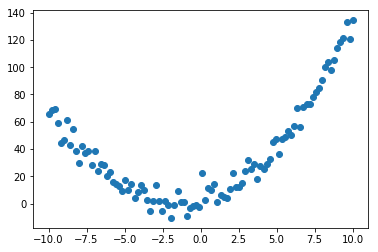

In [15]:
plt.scatter(x, y)

In [16]:
tf.reset_default_graph()

In [17]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [18]:
a = tf.get_variable(name="a", shape=[1]) 
b = tf.get_variable(name="b", shape=[1])
c = tf.get_variable(name="c", shape=[1])

In [19]:
y_ = a*(X**2) + b*X + c

In [20]:
loss = tf.losses.mean_squared_error(Y, y_)

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(500):
        sess.run(optimizer, feed_dict={X: x, Y: y})
        if epoch%100==0:
            print(sess.run([a, b, c, loss], feed_dict={X: x, Y: y}))
        y_preds, x_preds = sess.run([y_, X], feed_dict={X: x})

[array([0.62876457], dtype=float32), array([-0.77532035], dtype=float32), array([0.09267557], dtype=float32), 883.8794]
[array([1.0295988], dtype=float32), array([1.145693], dtype=float32), array([0.11954516], dtype=float32), 166.76146]
[array([1.0292698], dtype=float32), array([2.1165216], dtype=float32), array([0.13967904], dtype=float32), 69.17332]
[array([1.0289438], dtype=float32), array([2.6071527], dtype=float32), array([0.1596348], dtype=float32), 44.21961]
[array([1.0286205], dtype=float32), array([2.8551044], dtype=float32), array([0.17941396], dtype=float32), 37.81743]


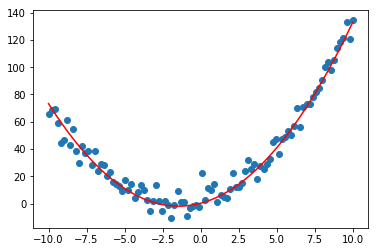

In [23]:
plt.scatter(x, y)
plt.plot(x_preds, y_preds, c='r')

### 11) Реализуйте класс TF_LinearRegression c методами как в [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (задание с *)

In [24]:
from sklearn.metrics import r2_score

class TF_LinearRegression:
    
    def __init__(self, learning_rate = 0.1, n_epoch = 100):
        self._learning_rate = learning_rate
        self._n_epoch = n_epoch
        tf.reset_default_graph()
        self._session = tf.Session()
    
    def __del__(self):
        self._session.close()        
    
    def fit(self, X, y):
        """Fit linear model."""
        self._k = tf.get_variable(name="coef", shape=[X.shape[1]] ) 
        self._b = tf.get_variable(name="intercept", shape=[1])
        X_fit = tf.placeholder(tf.float32, name='feature_fit')
        y_fit = tf.placeholder(tf.float32, name='target_fit')
        y_ = self._k * X_fit + self._b
        loss = tf.losses.mean_squared_error(y_fit, y_)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self._learning_rate).minimize(loss)
        self._session.run(tf.global_variables_initializer())
        for epoch in range(self._n_epoch):
            for (xx, yy) in zip(X, y):
                self._session.run(optimizer, feed_dict={X_fit: xx, y_fit: yy})
            self._session.run(optimizer, feed_dict={X_fit : X, y_fit : y})
            if 0==epoch%(self._n_epoch // 4):
                print(self._session.run([self._k, self._b, loss], feed_dict={X_fit : X, y_fit : y}))
        self.coef_ = self._session.run(self._k)
        self.intercept_ = self._session.run(self._b)
        return self
        
    def predict(self, X):
        """Predict using the linear model."""
        X_pred = tf.placeholder(tf.float32, name='feature_pred')
        y_ = self._k * X_pred + self._b
        return self._session.run(y_, feed_dict={X_pred : X})

    def score(self, X, y):
        """Returns the coefficient of determination R^2 of the prediction."""
        return r2_score(y, self.predict(X))

#### Тестовые данные - линейная зависимость с шумом

Одномерный случай для удобства визуализации

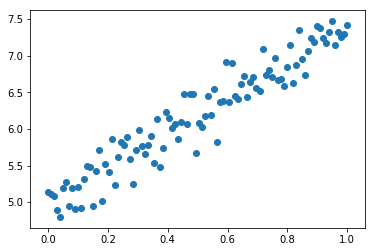

In [25]:
def linear_function_noise(X, scale=0.2):
    return X*2.4 + 5 + np.random.normal(size=X.size, loc=0, scale=scale).reshape(X.shape)

X_train = np.linspace(0, 1, 100).reshape(-1, 1)
y_train = linear_function_noise(X_train)

plt.scatter(X_train, y_train);

#### Линейная регрессия из **sklearn**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
%%time

sklr = LinearRegression()

sklr.fit(X_train, y_train)

Wall time: 993 µs


In [28]:
sklr.coef_, sklr.intercept_

(array([[2.43412468]]), array([4.97593484]))

#### Реализация линейной регресси в **Tensor flow**

In [29]:
%%time

tflr = TF_LinearRegression(0.1, 64)

tflr.fit(X_train, y_train)

[array([0.8566664], dtype=float32), array([6.30994], dtype=float32), 0.5553886]
[array([2.3694463], dtype=float32), array([5.0084143], dtype=float32), 0.04686483]
[array([2.3825207], dtype=float32), array([4.9971657], dtype=float32), 0.04675647]
[array([2.3826346], dtype=float32), array([4.9970675], dtype=float32), 0.046755843]
Wall time: 11.6 s


Коэффициенты подобрал достаточно точно:

In [30]:
tflr.coef_, tflr.intercept_

(array([2.3826346], dtype=float32), array([4.9970675], dtype=float32))

#### Тестовые данные - сместимся по оси.

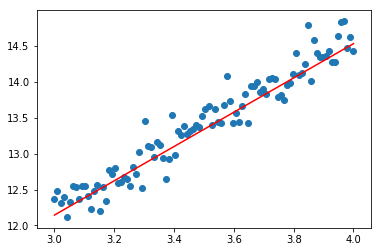

In [31]:
X_test = np.linspace(3, 4, 100).reshape(-1, 1)
y_test = linear_function_noise(X_test)

plt.scatter(X_test, y_test)

plt.plot(X_test, tflr.predict(X_test), c='r');

#### R2 score

In [32]:
tflr.score(X_test, y_test)

0.9231675677699938

In [33]:
sklr.score(X_test, y_test)

0.9211705713352804

----

In [34]:
# Оставьте свой комментарий по задачам (сложнее, проще, что понравилось, что нет)

_пока не слишком сложно)_

_задача на реализацию класса линейного регрессора понравилась_